In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

In [3]:
#os.chdir('F:\env_parameter')
#os.listdir()
imdaa_df = pd.read_csv('/media/krishna/297d584d-f229-4f8a-be6e-d8b11c336922/IITM project/env_parameter/df__8d.csv')
imdaa_df.drop(1012, axis = 0, inplace = True)
imdaa_df.drop(['Unnamed: 0'], axis = 1, inplace = True)
imdaa_df['wind'] = np.sqrt(np.square(imdaa_df['UGRD_10m_m s-1'].values) + np.square(imdaa_df['VGRD_10m_m s-1'].values))
imdaa_df['date'] = pd.to_datetime(imdaa_df['date'])
imdaa_df['year']=pd.to_datetime(imdaa_df['date']).dt.year
imdaa_df['doy']=pd.to_datetime(imdaa_df['date']).dt.day_of_year
imdaa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               1012 non-null   datetime64[ns]
 1   RH_2m_%            1010 non-null   float64       
 2   TMP_2m_K           1010 non-null   float64       
 3   UGRD_10m_m s-1     1007 non-null   float64       
 4   VGRD_10m_m s-1     1012 non-null   float64       
 5   CISOILM_L1_kg/m-2  966 non-null    float64       
 6   DLWRF_sfc_K/m2     1012 non-null   float64       
 7   DSWRF_sfc_W/m2     1012 non-null   float64       
 8   NLWRF_sfc_W/m2     1012 non-null   float64       
 9   NSWRF_sfc_W/m2     1012 non-null   float64       
 10  PRES_sfc_hPa       1010 non-null   float64       
 11  APCP_sfc_Kg/m2     1011 non-null   float64       
 12  VPD_hPa            1010 non-null   float64       
 13  PRES_sfc_Pa        1010 non-null   float64       
 14  wind    

In [4]:
df = imdaa_df[imdaa_df['year'].isin([2016,2017,2018])]
df.reset_index(drop = True, inplace = True)
df

date    RH_2m_%    TMP_2m_K  UGRD_10m_m s-1  VGRD_10m_m s-1  \
0   2016-01-01  79.621189  289.704244       -0.344012       -0.168148   
1   2016-01-09  83.635965  288.269768       -0.715742       -0.168148   
2   2016-01-17  85.078452  287.876156       -0.347159       -0.168148   
3   2016-01-25  79.972374  288.969903       -0.530849       -0.168148   
4   2016-02-02  79.929988  291.254240       -0.542372       -0.168148   
..         ...        ...         ...             ...             ...   
133 2018-11-25  78.225545  292.198989       -0.793646       -0.146047   
134 2018-12-03  76.049234  290.939721       -0.713855       -0.146047   
135 2018-12-11  72.872043  291.089650       -1.024108       -0.146047   
136 2018-12-19  83.603947  290.327702       -0.292866       -0.146047   
137 2018-12-27  80.429057  288.791222       -0.110584       -0.146047   

     CISOILM_L1_kg/m-2  DLWRF_sfc_K/m2  DSWRF_sfc_W/m2  NLWRF_sfc_W/m2  \
0            17.144052      325.795661      221.383386      -75.790560   
1            20.052291      327.594326      200.802186      -66.237175   
2            21.343187      331.440241      197.784223      -61.104161   
3            20.401228      338.181468      213.459600      -59.886645   
4            18.304039      347.483065      239.015898      -64.197719   
..                 ...             ...             ...             ...   
133          11.872050      337.933432      234.244251      -79.501444   
134           9.708943      334.865826      206.267298      -75.311714   
135           9.600467      342.416874      176.469967      -67.182678   
136          24.894183      336.117652      194.198241      -68.803346   
137          21.085963      318.370969      206.604847      -78.430772   

     NSWRF_sfc_W/m2  PRES_sfc_hPa  APCP_sfc_Kg/m2   VPD_hPa  PRES_sfc_Pa  \
0        187.124822    986.376893        0.020815  4.423471     9.863769   
1        169.694385    983.932949        0.081191  3.199322     9.839329   
2        167.199039    985.108453        0.059795  2.842410     9.851085   
3        180.373790    984.399101        0.046111  3.958546     9.843991   
4        202.024831    984.004966        0.037551  4.788469     9.840050   
..              ...           ...             ...       ...          ...   
133      198.037451    985.141960        0.001180  5.670069     9.851420   
134      174.355328    983.137025        0.004859  5.667637     9.831370   
135      149.210020    985.895775        0.200626  6.462855     9.858958   
136      164.119845    984.091731        0.006562  3.656561     9.840917   
137      174.684581    985.415437        0.027680  3.897298     9.854154   

         wind  year  doy  
0    0.382907  2016    1  
1    0.735228  2016    9  
2    0.385737  2016   17  
3    0.556843  2016   25  
4    0.567839  2016   33  
..        ...   ...  ...  
133  0.806972  2018  329  
134  0.728641  2018  337  
135  1.034469  2018  345  
136  0.327262  2018  353  
137  0.183190  2018  361  

[138 rows x 17 columns]

In [5]:
ft_df = pd.read_csv('/media/krishna/297d584d-f229-4f8a-be6e-d8b11c336922/IITM project/flux tower data/flux_tower_data.csv')
ft_df['date'] = pd.to_datetime(ft_df['date'])
ft_df

Unnamed: 0  Year  DoY   Hour       Tair      Wind      Qair     Rainf  \
0             0  2016    1  11.75  287.79816  0.522961  0.008193  0.017028   
1             1  2016    9  11.75  287.73578  0.520553  0.008222  0.032273   
2             2  2016   17  11.75  288.20737  0.541057  0.008765  0.011406   
3             3  2016   25  11.75  288.82324  0.516761  0.008383  0.000000   
4             4  2016   33  11.75  290.55313  0.517101  0.009489  0.015087   
..          ...   ...  ...    ...        ...       ...       ...       ...   
133         133  2018  329  11.75  290.90220  0.396667  0.010113  0.000000   
134         134  2018  337  11.75  289.99640  0.447309  0.009397  0.000000   
135         135  2018  345  11.75  289.95250  0.532031  0.009261  0.096372   
136         136  2018  353  11.75  289.90558  0.414826  0.009732  0.000000   
137         137  2018  361  11.75  288.10562  0.443889  0.008451  0.045028   

        SWdown       Psurf     LWdown       date  month  
0    123.49051  1005.43780  335.18063 2016-01-01      1  
1    117.42937  1005.35510  334.34344 2016-01-09      1  
2    109.30230  1007.22100  350.99167 2016-01-17      1  
3    122.23508  1006.42664  346.70270 2016-01-25      1  
4    126.32801  1006.04110  354.87790 2016-02-02      2  
..         ...         ...        ...        ...    ...  
133  170.67633  1007.54095  358.04355 2018-11-25     11  
134  156.27519  1005.53250  349.17910 2018-12-03     12  
135  128.32938  1008.49880  356.27182 2018-12-11     12  
136  140.83458  1006.39966  357.73956 2018-12-19     12  
137  152.63124  1007.60520  341.54420 2018-12-27     12  

[138 rows x 13 columns]

In [6]:
sum(np.array(df['doy']) == np.array(ft_df['DoY']))

138

Tair = ft_df.Tair.values - 273.15
SVP = 610.7*10**(7.5*Tair/(237.7 + Tair))
SH = ft_df.Qair.values
Pair = ft_df.Psurf.values
RH = SH/(0.623*SVP/(Pair - SVP))
AVP = SVP*RH/100
VPD = SVP - AVP
VPD = VPD/1000  # convert to hectopascal
VPD

imdaa_rh = df['RH_2m_%'].values/100
imdaa_Tair = df['TMP_2m_K']-273.15
imdaa_SVP = 610.7*10**(7.5*imdaa_Tair/(237.3 + imdaa_Tair))
imdaa_AVP = imdaa_SVP*imdaa_rh/100
imdaa_VPD = imdaa_SVP - imdaa_AVP
imdaa_VPD = imdaa_VPD/100       #convert to hectopascal

In [7]:
T = ft_df.Tair.values - 273.15
SH = ft_df.Qair.values
Pair = ft_df.Psurf.values*100                # Pair in Pa
SVP = 610.7*10**(7.5*T/(237.7 + T))
avp = SH * Pair / (0.622 + 0.378 * SH)
RH = avp/SVP*100
VPD = (SVP - avp)/100
#VPD   #(unit hPa)

In [8]:
px.scatter(x = VPD, y = [df['VPD_hPa']])

In [9]:
px.line(x = df.date, y = [VPD,df['VPD_hPa']])

In [10]:
ft_df['RH'] = RH
ft_df['FT_VPD'] = VPD    # unit ha
#ft_df['IMDAA_VPD'] = imdaa_VPD
ft_df

Unnamed: 0  Year  DoY   Hour       Tair      Wind      Qair     Rainf  \
0             0  2016    1  11.75  287.79816  0.522961  0.008193  0.017028   
1             1  2016    9  11.75  287.73578  0.520553  0.008222  0.032273   
2             2  2016   17  11.75  288.20737  0.541057  0.008765  0.011406   
3             3  2016   25  11.75  288.82324  0.516761  0.008383  0.000000   
4             4  2016   33  11.75  290.55313  0.517101  0.009489  0.015087   
..          ...   ...  ...    ...        ...       ...       ...       ...   
133         133  2018  329  11.75  290.90220  0.396667  0.010113  0.000000   
134         134  2018  337  11.75  289.99640  0.447309  0.009397  0.000000   
135         135  2018  345  11.75  289.95250  0.532031  0.009261  0.096372   
136         136  2018  353  11.75  289.90558  0.414826  0.009732  0.000000   
137         137  2018  361  11.75  288.10562  0.443889  0.008451  0.045028   

        SWdown       Psurf     LWdown       date  month         RH    FT_VPD  
0    123.49051  1005.43780  335.18063 2016-01-01      1  79.185589  3.463759  
1    117.42937  1005.35510  334.34344 2016-01-09      1  79.786161  3.350315  
2    109.30230  1007.22100  350.99167 2016-01-17      1  82.637799  2.966374  
3    122.23508  1006.42664  346.70270 2016-01-25      1  75.931588  4.277723  
4    126.32801  1006.04110  354.87790 2016-02-02      2  76.922119  4.577978  
..         ...         ...        ...        ...    ...        ...       ...  
133  170.67633  1007.54095  358.04355 2018-11-25     11  80.289576  3.996899  
134  156.27519  1005.53250  349.17910 2018-12-03     12  78.873021  4.046044  
135  128.32938  1008.49880  356.27182 2018-12-11     12  78.184546  4.166289  
136  140.83458  1006.39966  357.73956 2018-12-19     12  82.209684  3.387483  
137  152.63124  1007.60520  341.54420 2018-12-27     12  80.237515  3.354457  

[138 rows x 15 columns]

In [11]:
from sklearn.metrics import mean_squared_error
print('MEAN SQUARED ERROR BETWEEN IMDAA DATA AND FLUX TOWER DATA')
print('air_temp:',mean_squared_error(ft_df.Tair, df.TMP_2m_K, squared = False))
print('wind:',mean_squared_error(ft_df.Wind, df.wind, squared = False))
print('downward short wave radiation:',mean_squared_error(ft_df.SWdown, df['DSWRF_sfc_W/m2'], squared = False))
print('downward long wave radiation:',mean_squared_error(ft_df.LWdown, df['DLWRF_sfc_K/m2'], squared = False))
print('surface presure:',mean_squared_error(ft_df.Psurf, df['PRES_sfc_hPa'], squared = False))
print('VPD:',mean_squared_error(ft_df['FT_VPD'], df['VPD_hPa'], squared = False))

MEAN SQUARED ERROR BETWEEN IMDAA DATA AND FLUX TOWER DATA
air_temp: 0.7881643932864594
wind: 0.4080844957155171
downward short wave radiation: 86.71774988874596
downward long wave radiation: 11.459098277133467
surface presure: 22.019171257200952
VPD: 1.4918736157378851


/tmp/ipykernel_5997/3332916320.py:8: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



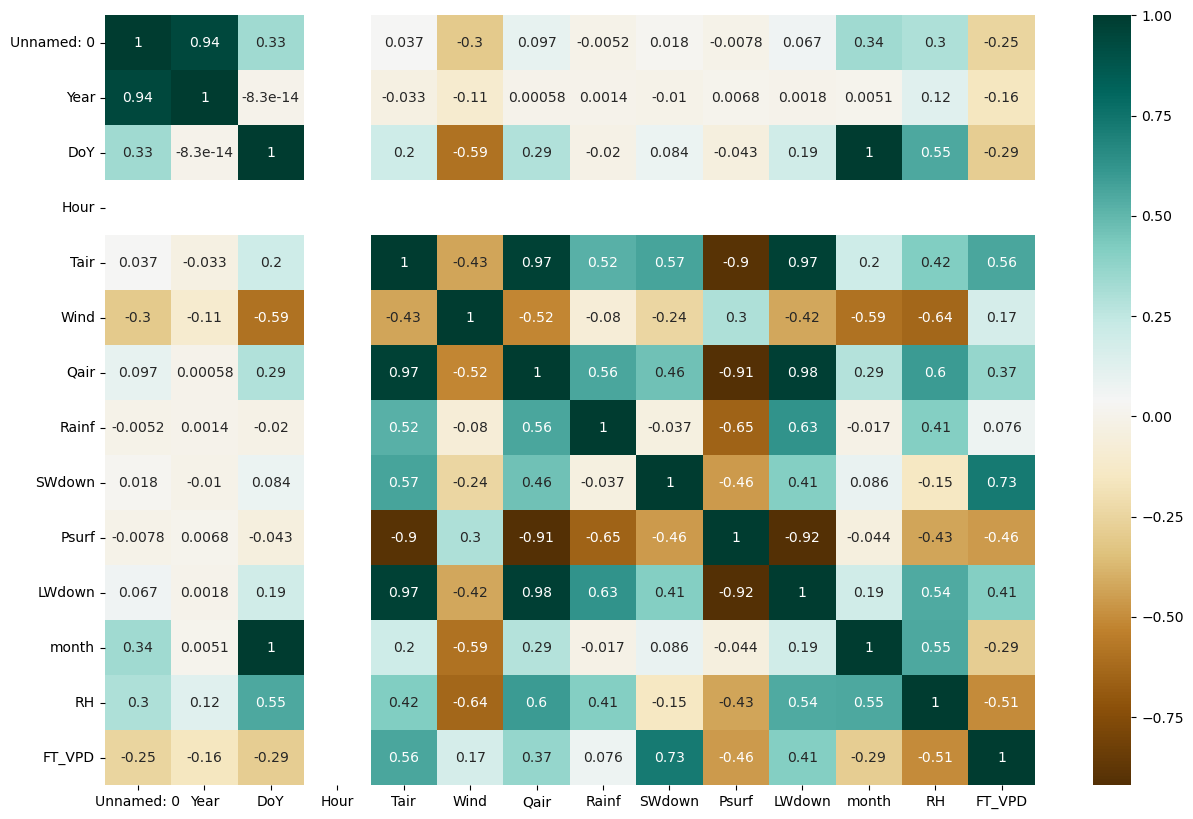

In [12]:
pred_LE = pd.read_csv('/media/krishna/297d584d-f229-4f8a-be6e-d8b11c336922/IITM project/knp big area/season_mol_pred_LE.csv')
pred_LE['date'] = pd.to_datetime(pred_LE['date'])
pred_LE.drop(['Unnamed: 0'], axis = 1, inplace = True)
pred_LE['year'] = pd.to_datetime(pred_LE['date']).dt.year
pred_LE = pred_LE[pred_LE['year'].isin([2016,2017,2018])]
import seaborn as sns
plt.figure(figsize = (15,10))
corr_matrix = ft_df.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'BrBG')
plt.show()

In [13]:
print(df.columns)
print(ft_df.columns)

Index(['date', 'RH_2m_%', 'TMP_2m_K', 'UGRD_10m_m s-1', 'VGRD_10m_m s-1',
       'CISOILM_L1_kg/m-2', 'DLWRF_sfc_K/m2', 'DSWRF_sfc_W/m2',
       'NLWRF_sfc_W/m2', 'NSWRF_sfc_W/m2', 'PRES_sfc_hPa', 'APCP_sfc_Kg/m2',
       'VPD_hPa', 'PRES_sfc_Pa', 'wind', 'year', 'doy'],
      dtype='object')
Index(['Unnamed: 0', 'Year', 'DoY', 'Hour', 'Tair', 'Wind', 'Qair', 'Rainf',
       'SWdown', 'Psurf', 'LWdown', 'date', 'month', 'RH', 'FT_VPD'],
      dtype='object')


In [14]:
gd_df = pd.concat([df[['date','TMP_2m_K','wind','APCP_sfc_Kg/m2','DLWRF_sfc_K/m2','DSWRF_sfc_W/m2','PRES_sfc_hPa','VPD_hPa']],
                 ft_df[['Tair','Wind','Rainf','LWdown','SWdown','Psurf','FT_VPD']]],axis = 1)
gd_df['date'] = pd.to_datetime(gd_df['date'])
gd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            138 non-null    datetime64[ns]
 1   TMP_2m_K        138 non-null    float64       
 2   wind            138 non-null    float64       
 3   APCP_sfc_Kg/m2  138 non-null    float64       
 4   DLWRF_sfc_K/m2  138 non-null    float64       
 5   DSWRF_sfc_W/m2  138 non-null    float64       
 6   PRES_sfc_hPa    138 non-null    float64       
 7   VPD_hPa         138 non-null    float64       
 8   Tair            138 non-null    float64       
 9   Wind            138 non-null    float64       
 10  Rainf           138 non-null    float64       
 11  LWdown          138 non-null    float64       
 12  SWdown          138 non-null    float64       
 13  Psurf           138 non-null    float64       
 14  FT_VPD          138 non-null    float64       
dtypes: dat

In [15]:
gd_df

date    TMP_2m_K      wind  APCP_sfc_Kg/m2  DLWRF_sfc_K/m2  \
0   2016-01-01  289.704244  0.382907        0.020815      325.795661   
1   2016-01-09  288.269768  0.735228        0.081191      327.594326   
2   2016-01-17  287.876156  0.385737        0.059795      331.440241   
3   2016-01-25  288.969903  0.556843        0.046111      338.181468   
4   2016-02-02  291.254240  0.567839        0.037551      347.483065   
..         ...         ...       ...             ...             ...   
133 2018-11-25  292.198989  0.806972        0.001180      337.933432   
134 2018-12-03  290.939721  0.728641        0.004859      334.865826   
135 2018-12-11  291.089650  1.034469        0.200626      342.416874   
136 2018-12-19  290.327702  0.327262        0.006562      336.117652   
137 2018-12-27  288.791222  0.183190        0.027680      318.370969   

     DSWRF_sfc_W/m2  PRES_sfc_hPa   VPD_hPa       Tair      Wind     Rainf  \
0        221.383386    986.376893  4.423471  287.79816  0.522961  0.017028   
1        200.802186    983.932949  3.199322  287.73578  0.520553  0.032273   
2        197.784223    985.108453  2.842410  288.20737  0.541057  0.011406   
3        213.459600    984.399101  3.958546  288.82324  0.516761  0.000000   
4        239.015898    984.004966  4.788469  290.55313  0.517101  0.015087   
..              ...           ...       ...        ...       ...       ...   
133      234.244251    985.141960  5.670069  290.90220  0.396667  0.000000   
134      206.267298    983.137025  5.667637  289.99640  0.447309  0.000000   
135      176.469967    985.895775  6.462855  289.95250  0.532031  0.096372   
136      194.198241    984.091731  3.656561  289.90558  0.414826  0.000000   
137      206.604847    985.415437  3.897298  288.10562  0.443889  0.045028   

        LWdown     SWdown       Psurf    FT_VPD  
0    335.18063  123.49051  1005.43780  3.463759  
1    334.34344  117.42937  1005.35510  3.350315  
2    350.99167  109.30230  1007.22100  2.966374  
3    346.70270  122.23508  1006.42664  4.277723  
4    354.87790  126.32801  1006.04110  4.577978  
..         ...        ...         ...       ...  
133  358.04355  170.67633  1007.54095  3.996899  
134  349.17910  156.27519  1005.53250  4.046044  
135  356.27182  128.32938  1008.49880  4.166289  
136  357.73956  140.83458  1006.39966  3.387483  
137  341.54420  152.63124  1007.60520  3.354457  

[138 rows x 15 columns]

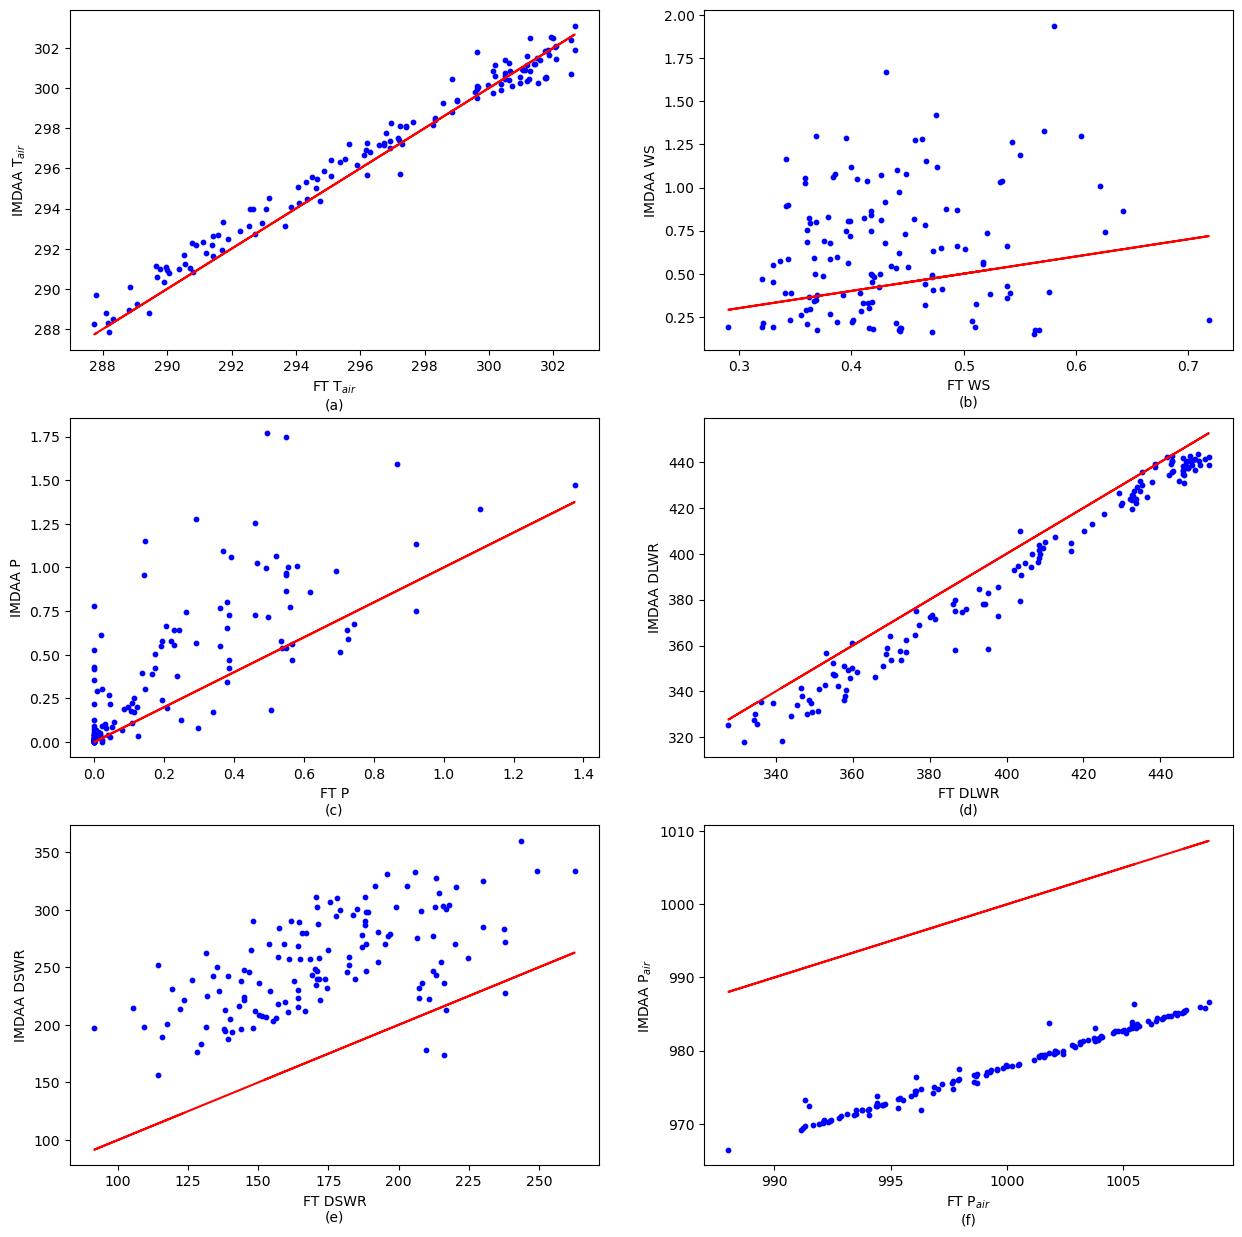

In [16]:
fig, axes = plt.subplots(3,2,figsize = (15,15))
axes[0,0].scatter(gd_df['Tair'],gd_df['TMP_2m_K'], s= 10, c = 'blue')
axes[0,0].plot(gd_df['Tair'],gd_df['Tair'], c = 'r')
axes[0,0].set_xlabel('FT T$_{air}$\n(a)')
axes[0,0].set_ylabel('IMDAA T$_{air}$')


axes[0,1].scatter(gd_df['Wind'], gd_df['wind'], s= 10,c = 'blue')
axes[0,1].plot(gd_df['Wind'], gd_df['Wind'], c = 'r')
axes[0,1].set_xlabel('FT WS\n(b)')
axes[0,1].set_ylabel('IMDAA WS')

axes[1,0].scatter(gd_df['Rainf'], gd_df['APCP_sfc_Kg/m2'], s= 10, c = 'blue')
axes[1,0].plot(gd_df['Rainf'], gd_df['Rainf'], c = 'r')
axes[1,0].set_xlabel('FT P\n(c)')
axes[1,0].set_ylabel('IMDAA P')

axes[1,1].scatter(gd_df['LWdown'], gd_df['DLWRF_sfc_K/m2'], s= 10, c = 'blue')
axes[1,1].plot(gd_df['LWdown'], gd_df['LWdown'], c = 'r')
axes[1,1].set_xlabel('FT DLWR\n(d)')
axes[1,1].set_ylabel('IMDAA DLWR')

axes[2,0].scatter(gd_df['SWdown'], gd_df['DSWRF_sfc_W/m2'], s= 10, c = 'blue')
axes[2,0].plot(gd_df['SWdown'], gd_df['SWdown'], c = 'r')
axes[2,0].set_xlabel('FT DSWR\n(e)')
axes[2,0].set_ylabel('IMDAA DSWR')

axes[2,1].scatter(gd_df['Psurf'], gd_df['PRES_sfc_hPa'], s= 10, c = 'blue')
axes[2,1].plot(gd_df['Psurf'], gd_df['Psurf'], c = 'r')
axes[2,1].set_xlabel('FT P$_{air}$\n(f)')
axes[2,1].set_ylabel('IMDAA P$_{air}$')

plt.savefig('F:\\graph\\New folder\\FT vs IMDAA2.png', dpi = 300)

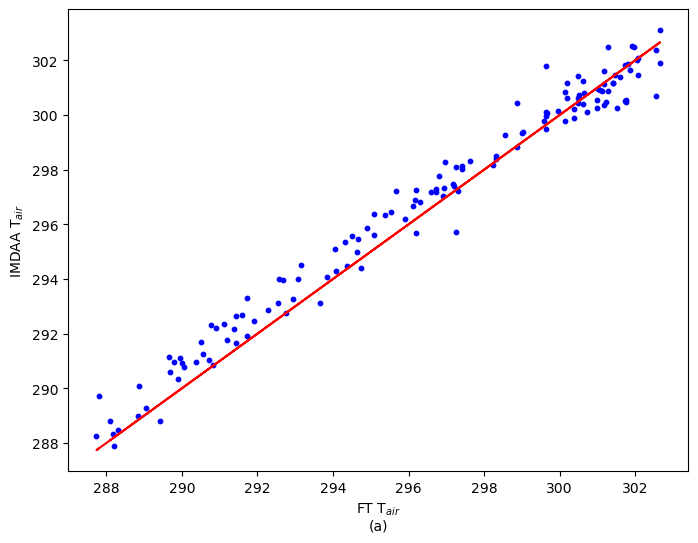

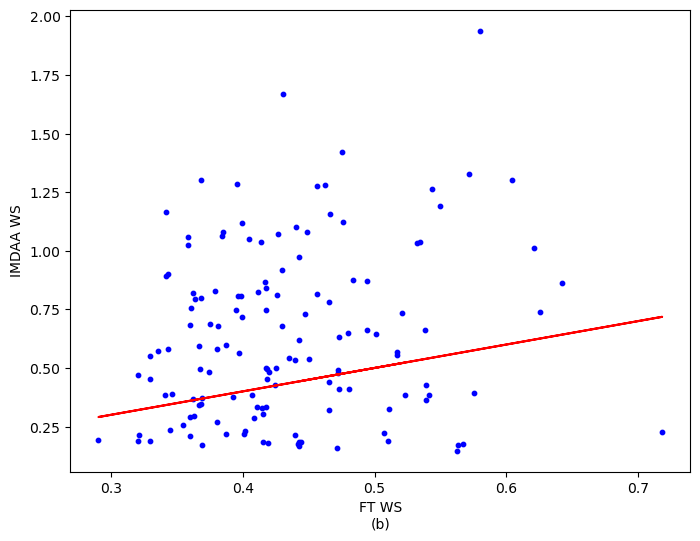

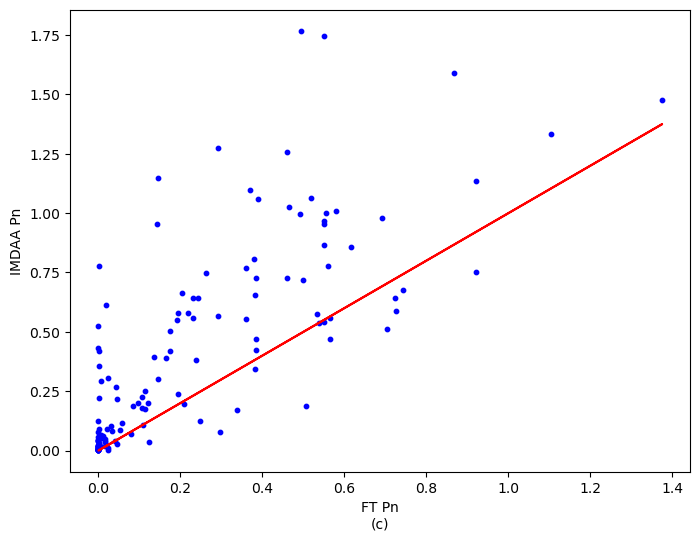

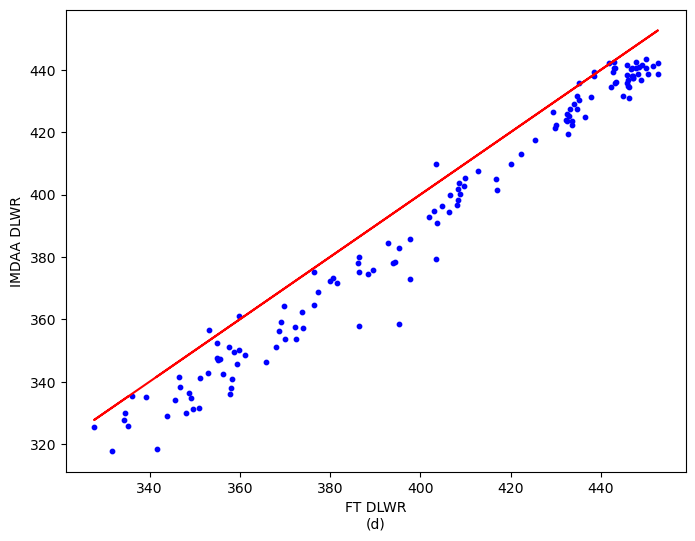

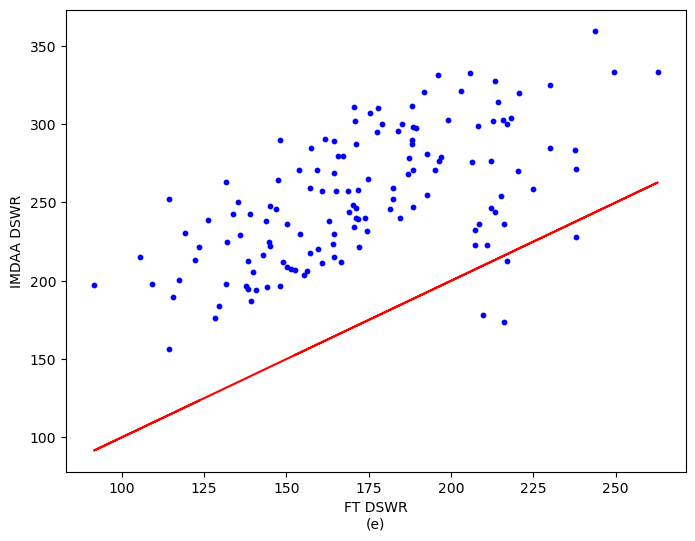

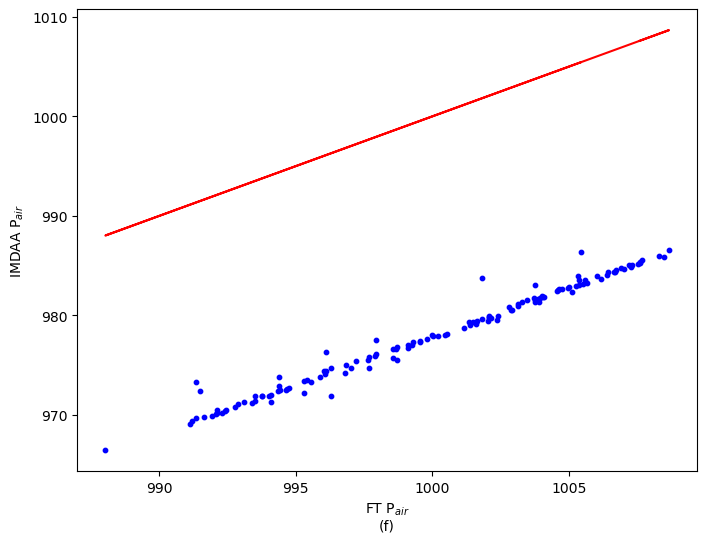

In [17]:
plt.figure(figsize = (8,6))
plt.scatter(gd_df['Tair'],gd_df['TMP_2m_K'], s= 10, c = 'blue')
plt.plot(gd_df['Tair'],gd_df['Tair'], c = 'r')
plt.xlabel('FT T$_{air}$\n(a)')
plt.ylabel('IMDAA T$_{air}$')
plt.savefig('plots3/FT vs IMDAA2 Tair.png', dpi = 600)
plt.show()

plt.figure(figsize = (8,6))
plt.scatter(gd_df['Wind'], gd_df['wind'], s= 10,c = 'blue')
plt.plot(gd_df['Wind'], gd_df['Wind'], c = 'r')
plt.xlabel('FT WS\n(b)')
plt.ylabel('IMDAA WS')
plt.savefig('plots3/FT vs IMDAA2 WS.png', dpi = 600)
plt.show()

plt.figure(figsize = (8,6))
plt.scatter(gd_df['Rainf'], gd_df['APCP_sfc_Kg/m2'], s= 10, c = 'blue')
plt.plot(gd_df['Rainf'], gd_df['Rainf'], c = 'r')
plt.xlabel('FT Pn\n(c)')
plt.ylabel('IMDAA Pn')
plt.savefig('plots3/FT vs IMDAA2 Pn.png', dpi = 600)
plt.show()

plt.figure(figsize = (8,6))
plt.scatter(gd_df['LWdown'], gd_df['DLWRF_sfc_K/m2'], s= 10, c = 'blue')
plt.plot(gd_df['LWdown'], gd_df['LWdown'], c = 'r')
plt.xlabel('FT DLWR\n(d)')
plt.ylabel('IMDAA DLWR')
plt.savefig('plots3/FT vs IMDAA2 DLWR.png', dpi = 600)
plt.show()

plt.figure(figsize = (8,6))
plt.scatter(gd_df['SWdown'], gd_df['DSWRF_sfc_W/m2'], s= 10, c = 'blue')
plt.plot(gd_df['SWdown'], gd_df['SWdown'], c = 'r')
plt.xlabel('FT DSWR\n(e)')
plt.ylabel('IMDAA DSWR')
plt.savefig('plots3/FT vs IMDAA2 DSWR.png', dpi = 600)
plt.show()

plt.figure(figsize = (8,6))
plt.scatter(gd_df['Psurf'], gd_df['PRES_sfc_hPa'], s= 10, c = 'blue')
plt.plot(gd_df['Psurf'], gd_df['Psurf'], c = 'r')
plt.xlabel('FT P$_{air}$\n(f)')
plt.ylabel('IMDAA P$_{air}$')
plt.savefig('plots3/FT vs IMDAA2 Pair.png', dpi = 600)
plt.show()


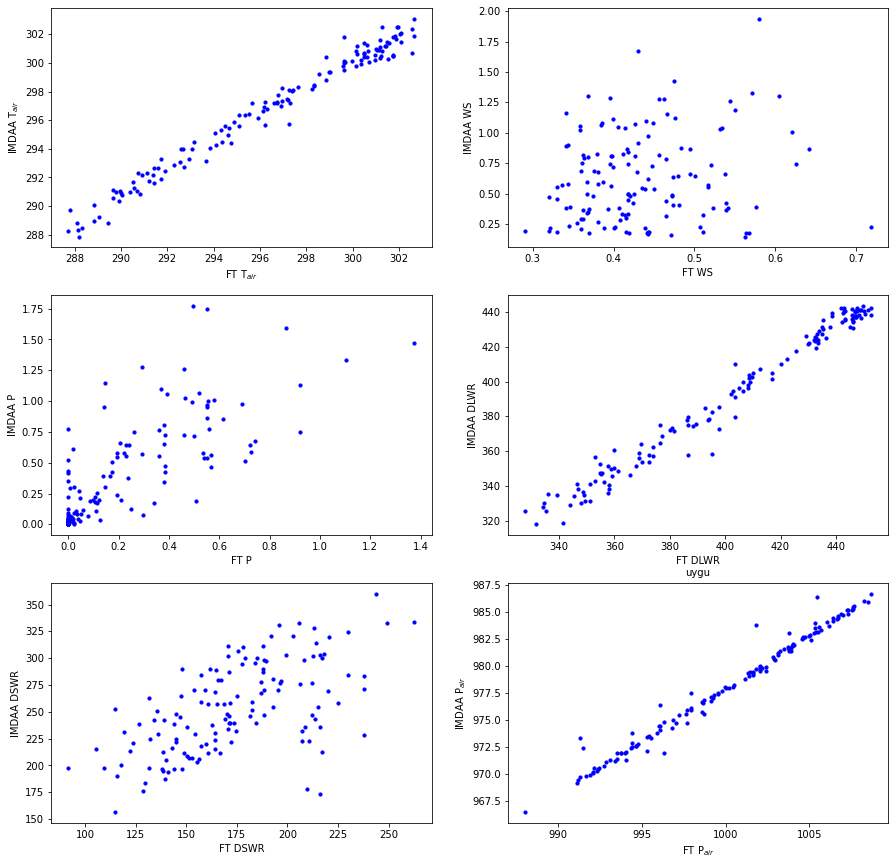

In [17]:
fig, axes = plt.subplots(3,2,figsize = (15,15))
axes[0,0].scatter(gd_df['Tair'],gd_df['TMP_2m_K'], s= 10, c = 'blue')
#xes[0,0].plot(gd_df['Tair'],gd_df['Tair'], c = 'r')
axes[0,0].set_xlabel('FT T$_{air}$')
axes[0,0].set_ylabel('IMDAA T$_{air}$')

axes[0,1].scatter(gd_df['Wind'], gd_df['wind'], s= 10,c = 'blue')
#xes[0,1].plot(gd_df['Wind'], gd_df['Wind'], c = 'r')
axes[0,1].set_xlabel('FT WS')
axes[0,1].set_ylabel('IMDAA WS')

axes[1,0].scatter(gd_df['Rainf'], gd_df['APCP_sfc_Kg/m2'], s= 10, c = 'blue')
#xes[1,0].plot(gd_df['Rainf'], gd_df['Rainf'], c = 'r')
axes[1,0].set_xlabel('FT P')
axes[1,0].set_ylabel('IMDAA P')

axes[1,1].scatter(gd_df['LWdown'], gd_df['DLWRF_sfc_K/m2'], s= 10, c = 'blue')
#xes[1,1].plot(gd_df['LWdown'], gd_df['LWdown'], c = 'r')
axes[1,1].set_xlabel('FT DLWR')
axes[1,1].set_ylabel('IMDAA DLWR')

axes[2,0].scatter(gd_df['SWdown'], gd_df['DSWRF_sfc_W/m2'], s= 10, c = 'blue')
#xes[2,0].plot(gd_df['SWdown'], gd_df['SWdown'], c = 'r')
axes[2,0].set_xlabel('FT DSWR')
axes[2,0].set_ylabel('IMDAA DSWR')

axes[2,1].scatter(gd_df['Psurf'], gd_df['PRES_sfc_hPa'], s= 10, c = 'blue')
#xes[2,1].plot(gd_df['Psurf'], gd_df['Psurf'], c = 'r')
axes[2,1].set_xlabel('FT P$_{air}$')
axes[2,1].set_ylabel('IMDAA P$_{air}$')

plt.savefig('F:\\graph\\New folder\\FT vs IMDAA.png', dpi = 300)

In [22]:
from scipy import stats
from scipy.stats import chi2_contingency
p_value = []
for i in range(7):
    print(gd_df.columns[i+1], gd_df.columns[i+8])
    p_value.append(stats.ttest_ind(gd_df.iloc[:,i+1],gd_df.iloc[:,i+8])[-1])
   

TMP_2m_K Tair
wind Wind
APCP_sfc_Kg/m2 Rainf
DLWRF_sfc_K/m2 LWdown
DSWRF_sfc_W/m2 SWdown
PRES_sfc_hPa Psurf
VPD_hPa FT_VPD


In [20]:
p_value

[0.4989268445506576,
 2.053787743334283e-09,
 3.3412916795688965e-05,
 0.04102161200974338,
 3.878703190785891e-46,
 1.9912777428858834e-105,
 0.28746077579251655]

In [29]:
for i in range(7):
    chi2, p, _, _ = chi2_contingency(gd_df.iloc[:,[i+1,i+8]], correction=False)
    print(p)

1.0
1.0
1.0
1.0
4.0625283125249686e-25
1.0
1.0


In [26]:
gd_df.iloc[:,[0+1,0+8]]

TMP_2m_K       Tair
0    289.704244  287.79816
1    288.269768  287.73578
2    287.876156  288.20737
3    288.969903  288.82324
4    291.254240  290.55313
..          ...        ...
133  292.198989  290.90220
134  290.939721  289.99640
135  291.089650  289.95250
136  290.327702  289.90558
137  288.791222  288.10562

[138 rows x 2 columns]

In [31]:
import statsmodels.api as sm
for i in range(7):
    x = gd_df.iloc[:,i+1]
    y = gd_df.iloc[:,i+8]
    x = sm.add_constant(x)
    model = sm.OLS(y, x)
    results = model.fit()

    # Print the regression results summary
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Tair   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     6066.
Date:                Sun, 14 May 2023   Prob (F-statistic):          1.06e-114
Time:                        11:11:20   Log-Likelihood:                -138.89
No. Observations:                 138   AIC:                             281.8
Df Residuals:                     136   BIC:                             287.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.3869      4.029     -4.315      0.0

In [15]:
px.scatter(gd_df, x = 'TMP_2m_K', y = 'Tair')

In [16]:
fig = px.line(gd_df, x = 'date', y = ['TMP_2m_K', 'Tair'], markers = True)
fig.show()

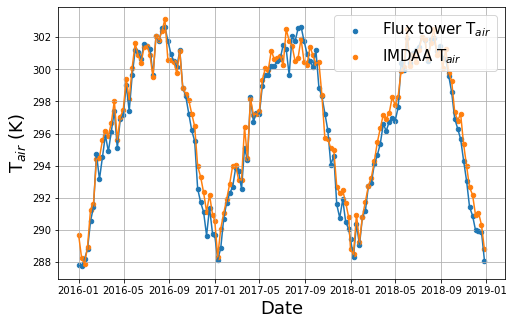

In [44]:
plt.figure(figsize = (8,5))
plt.scatter(gd_df['date'], gd_df['Tair'],s = 20, label = 'Flux tower T$_{air}$')
plt.plot(gd_df['date'], gd_df['Tair'])
plt.scatter(gd_df['date'], gd_df['TMP_2m_K'], s = 20, label = 'IMDAA T$_{air}$')
plt.plot(gd_df['date'], gd_df['TMP_2m_K'])
plt.legend(loc = 'upper right', fontsize = 15)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('T$_{air}$ (K)', fontsize = 18)
#plt.title('IMDAA Tair and Flux tower Tair')
plt.grid(True)
plt.savefig('F:\\graph\\New folder\\FTandMODIS Tair.png', dpi = 300)
plt.show()

In [20]:
px.scatter(gd_df, x = 'wind', y = 'Wind')

In [21]:
px.scatter(gd_df, x = 'date', y = ['wind', 'Wind'], labels= {'wind':'IMDAA_wind','Wind':'FT_wind'})

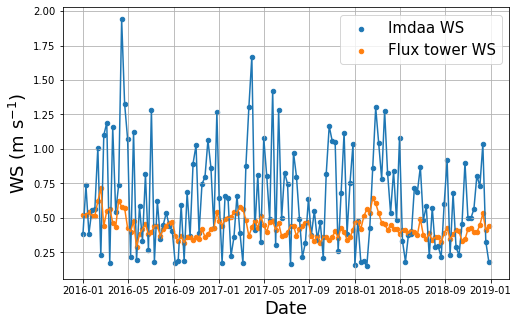

In [45]:
plt.figure(figsize = (8,5))
plt.scatter(gd_df.date, gd_df['wind'],s = 20, label = 'Imdaa WS')
plt.plot(gd_df.date, gd_df['wind'])
plt.scatter(gd_df.date, gd_df['Wind'],s = 20, label = 'Flux tower WS')
plt.plot(gd_df.date, gd_df['Wind'])
plt.legend(loc = 'upper right', fontsize = 15)
plt.grid(True)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('WS (m s$^{-1}$)', fontsize = 18)
#plt.title('IMDAA and Flux tower wind speed', fontsize = 15)
plt.savefig('F:\\graph\\New folder\\FTandMODIS wind speed.png', dpi = 300)
plt.show()

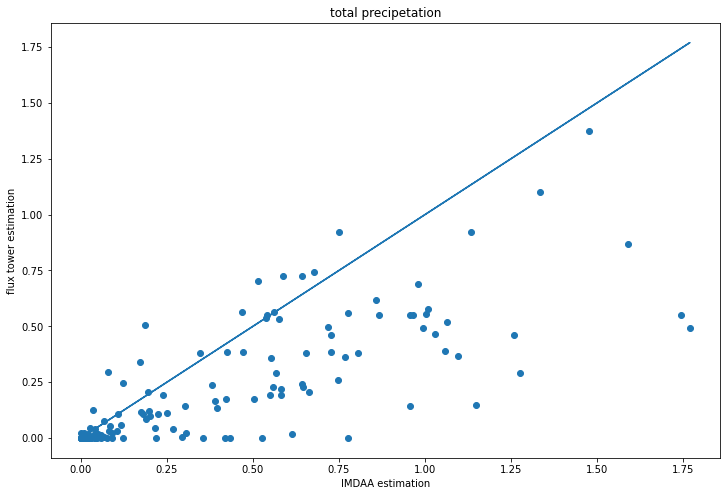

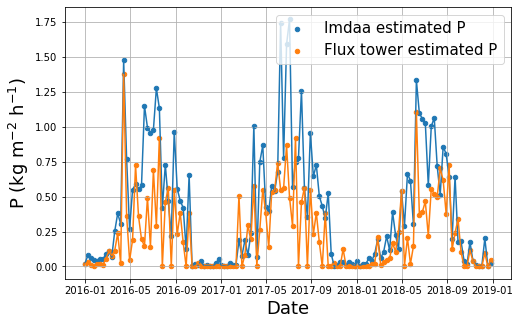

[[1.         0.77366647]
 [0.77366647 1.        ]]


In [47]:
#px.scatter(gd_df, x = 'APCP_sfc_Kg/m2', y = 'Rainf')
plt.figure(figsize = (12,8))
plt.scatter(gd_df['APCP_sfc_Kg/m2'],gd_df['Rainf'])
plt.plot(gd_df['APCP_sfc_Kg/m2'],gd_df['APCP_sfc_Kg/m2'])
plt.title('total precipetation')
plt.xlabel('IMDAA estimation')
plt.ylabel('flux tower estimation')
plt.show()

plt.figure(figsize = (8,5))
plt.scatter(gd_df.date, gd_df['APCP_sfc_Kg/m2'],s = 20, label = 'Imdaa estimated P')
plt.plot(gd_df.date, gd_df['APCP_sfc_Kg/m2'])
plt.scatter(gd_df.date, gd_df['Rainf'],s = 20, label = 'Flux tower estimated P')
plt.plot(gd_df.date, gd_df['Rainf'])
plt.legend(loc = 'upper right', fontsize = 15)
plt.grid(True)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('P (kg m$^{-2}$ h$^{-1}$)', fontsize = 18)
#plt.title('IMDAA and Flux tower Precipitation', fontsize = 18)
plt.savefig('F:\\graph\\New folder\\FTandMODIS precipitation.png', dpi = 300)
plt.show()
print(np.corrcoef(gd_df['APCP_sfc_Kg/m2'],gd_df['Rainf']))

In [26]:
px.line(gd_df, x = 'date', y = ['Rainf','APCP_sfc_Kg/m2'], markers = True)

In [27]:
px.scatter(gd_df, x = 'DSWRF_sfc_W/m2', y = ['SWdown'])

[]

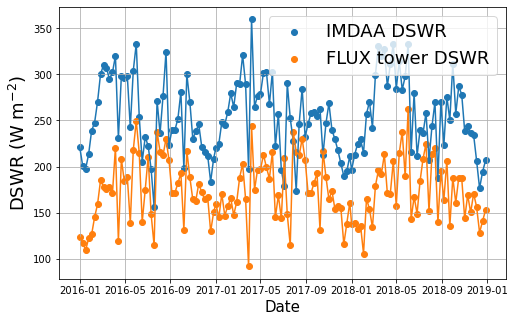

In [52]:
plt.figure(figsize = (8,5))
plt.plot(gd_df['date'], gd_df['DSWRF_sfc_W/m2'])
plt.scatter(gd_df['date'], gd_df['DSWRF_sfc_W/m2'], label = 'IMDAA DSWR')
plt.scatter(gd_df['date'], gd_df['SWdown'], label = 'FLUX tower DSWR')
plt.plot(gd_df['date'], gd_df['SWdown'])
plt.xlabel('Date', fontsize = 15)
plt.ylabel('DSWR (W m$^{-2}$)', fontsize = 18)
plt.grid(True)
#plt.title('IMDAA and Flux tower DSWR')
plt.legend(loc = 'upper right', fontsize =18)
plt.savefig('F:\\graph\\New folder\\FTandMODIS DSWR.png', dpi = 300)
plt.plot()

In [29]:
px.line(gd_df, x = 'date', y = [gd_df['DSWRF_sfc_W/m2'],'SWdown'], markers = True)

In [30]:
px.line(x = gd_df['date'], y = [gd_df['DSWRF_sfc_W/m2'].values-90,gd_df['SWdown']], markers = True)

In [31]:
px.scatter(gd_df, x = 'DLWRF_sfc_K/m2', y = 'LWdown')

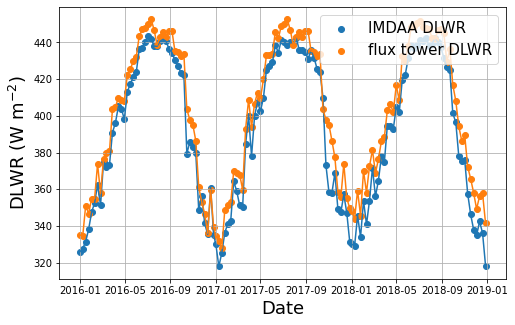

In [50]:
plt.figure(figsize = (8,5))
plt.scatter(gd_df['date'], gd_df['DLWRF_sfc_K/m2'], label = 'IMDAA DLWR')
plt.plot(gd_df['date'], gd_df['DLWRF_sfc_K/m2'])
plt.scatter(gd_df['date'], gd_df['LWdown'], label = 'flux tower DLWR')
plt.plot(gd_df['date'], gd_df['LWdown'])
plt.legend(loc = 'upper right', fontsize = 15)
plt.grid(True)
plt.xlabel('Date', fontsize =18)
plt.ylabel('DLWR (W m$^{-2}$)', fontsize =18)
#plt.title('IMDAA and Flux tower DLWR',fontsize = 12)
plt.savefig('F:\\graph\\New folder\\FTandMODIS DLWR.png', dpi = 300)
plt.show()

In [33]:
px.scatter(gd_df, x = 'date', y = ['DLWRF_sfc_K/m2', 'LWdown'])

In [34]:
px.scatter(gd_df, x = 'PRES_sfc_hPa', y = 'Psurf')

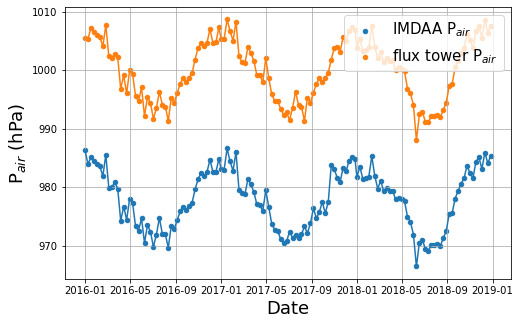

In [51]:
plt.figure(figsize = (8,5))
plt.scatter(gd_df['date'], gd_df['PRES_sfc_hPa'],s = 20, label = 'IMDAA P$_{air}$')
plt.plot(gd_df['date'], gd_df['PRES_sfc_hPa'])
plt.scatter(gd_df['date'], gd_df['Psurf'],s = 20, label = 'flux tower P$_{air}$')
plt.plot(gd_df['date'], gd_df['Psurf'])
plt.legend(loc = 'upper right', fontsize = 15)
plt.grid(True)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('P$_{air}$ (hPa)', fontsize = 18)
#plt.title('IMDAA and Flux tower surface presure',fontsize = 15)
plt.savefig('F:\\graph\\New folder\\FTandMODIS Psurf.png', dpi = 300)
plt.show()

In [37]:
px.scatter(gd_df, x = 'date', y = ['PRES_sfc_hPa', 'Psurf'])

In [38]:
fig = px.scatter(gd_df, x = 'VPD_hPa', y = 'FT_VPD')
fig.update_layout(xaxis_title = 'IMDAA_VPD')
fig.show()

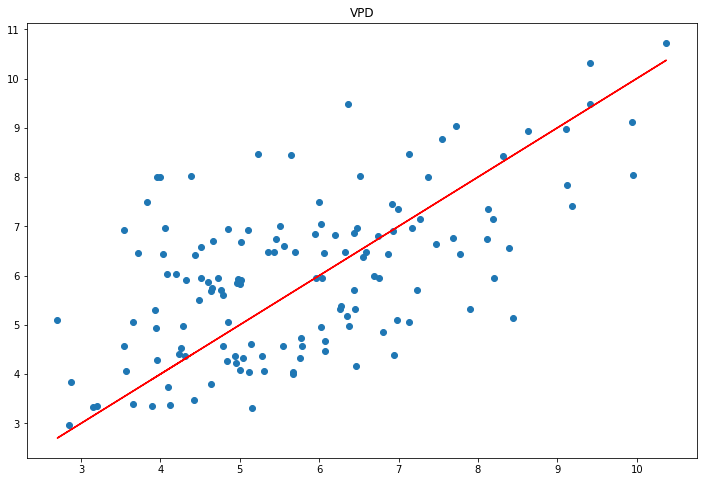

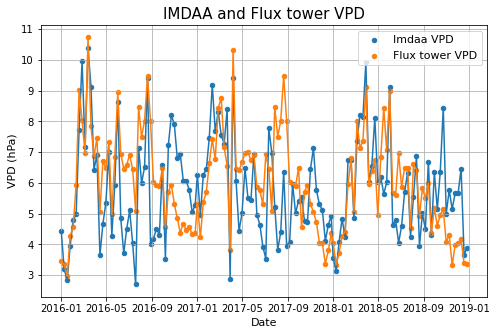

[[1.         0.58510007]
 [0.58510007 1.        ]]


In [39]:
plt.figure(figsize = (12,8))
plt.scatter(gd_df['VPD_hPa'], gd_df['FT_VPD'])
plt.title('VPD')
plt.plot(gd_df['VPD_hPa'],gd_df['VPD_hPa'], c='r')
plt.show()

plt.figure(figsize = (8,5))
plt.scatter(gd_df.date, gd_df['VPD_hPa'],s = 20, label = 'Imdaa VPD')
plt.plot(gd_df.date, gd_df['VPD_hPa'])
plt.scatter(gd_df.date, gd_df['FT_VPD'],s = 20, label = 'Flux tower VPD')
plt.plot(gd_df.date, gd_df['FT_VPD'])
plt.legend(loc = 'upper right', fontsize = 11)
plt.grid(True)
plt.xlabel('Date', fontsize = 11)
plt.ylabel('VPD (hPa)', fontsize = 11)
plt.title('IMDAA and Flux tower VPD', fontsize = 15)
plt.savefig('F:\\graph\\New folder\\FTandMODIS VPD.png', dpi = 300)
plt.show()

print(np.corrcoef(gd_df['VPD_hPa'], gd_df['FT_VPD']))

In [40]:
fig = px.line(gd_df, x = 'date', y = ['FT_VPD', 'VPD_hPa'], markers = True)

fig.show()

# VPD

In [91]:
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_percentage_error
def residual_error_plot(y_true, y_predict):
    plt.plot(figsize = (8,6))
    plt.scatter(y_predict,y_true - y_predict)
    plt.plot(y_predict, np.zeros(y_predict.shape[0]),c = 'r')
    plt.xlabel('predicted_values', fontsize = 12)
    plt.ylabel('y_true - y_predict', fontsize = 12)
    plt.title('Residual Error Plot', fontsize = 15)
    plt.show()
def test_model(model):                     #on test data x_test, y_test
    print('on test data "X_test"')                     
    pred = model.predict(x_test.reshape(-1,1))
    print('root mean squared error:',mean_squared_error(y_test, pred, squared = False))
    print('r2 score', r2_score(y_test, pred))
    plt.scatter(pred, y_test)
    plt.title('predicted and true value on test data',fontsize = 15)
    plt.xlabel('predicted_values',fontsize = 12)
    plt.ylabel('True values',fontsize = 12)
    plt.show()

RMSE between FT_VPD and IMDAA VPD:1.4918736157378851 and P correlation:0.5851000685855963
MAPE between FT_VPD and IMDAA VPD:0.20560175105770293
on test data "X_test"
root mean squared error: 1.3681575271307305
r2 score 0.20326480160362448


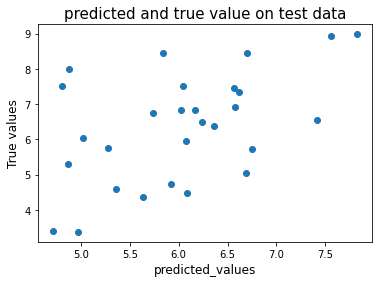

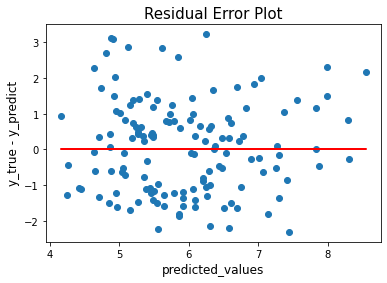

rmse after tranning: 1.2978550374200073
MAPE after tranning: 0.19345258559980022


In [37]:
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x = gd_df['VPD_hPa'].values
y = gd_df['FT_VPD'].values
print(f"RMSE between FT_VPD and IMDAA VPD:{mean_squared_error(y,x, squared = False)} and P correlation:{pearsonr(x,y)[0]}")
print(f"MAPE between FT_VPD and IMDAA VPD:{mean_absolute_percentage_error(y,x,)}")
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 42, test_size = 0.2)
vpd_lrg = LinearRegression()
vpd_lrg.fit(x_train.reshape(-1,1), y_train)
test_model(vpd_lrg)
residual_error_plot(y, vpd_lrg.predict(x.reshape(-1,1)))
print('rmse after tranning:',mean_squared_error(y, vpd_lrg.predict(x.reshape(-1,1)), squared = False))
print('MAPE after tranning:',mean_absolute_percentage_error(y, vpd_lrg.predict(x.reshape(-1,1))))

In [38]:
px.line(x = np.arange(len(y)), y = [y, x, vpd_lrg.predict(x.reshape(-1,1))])

# For air temperature

RMSE between air temp:0.7881643932864594 and P correlation:0.9889754793400312


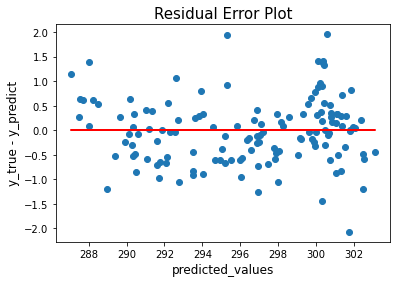

rmse after tranning: 0.6623604449346113
MAPE before tranning: 0.0021330282548564436
MAPE after tranning: 0.0017255676355612357


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from numpy import cov

x = gd_df.TMP_2m_K.values
y = gd_df.Tair.values
print(f"RMSE between air temp:{mean_squared_error(y,x, squared = False)} and P correlation:{pearsonr(x,y)[0]}")
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 42, test_size = 0.2)
Tair_lrg = LinearRegression()
Tair_lrg.fit(x_train.reshape(-1,1), y_train)
pred = Tair_lrg.predict(x.reshape(-1,1))
residual_error_plot(y, pred)
print('rmse after tranning:',mean_squared_error(y, pred, squared = False))
print('MAPE before tranning:',mean_absolute_percentage_error(y, x))
print('MAPE after tranning:',mean_absolute_percentage_error(y, pred))

on test data "X_test"
root mean squared error: 0.5513911409967964
r2 score 0.9810909787926495


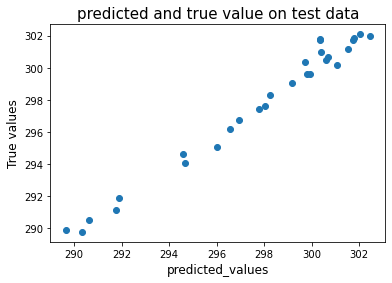

In [40]:
test_model(Tair_lrg)

In [41]:
mean_squared_error(y, Tair_lrg.predict(x.reshape(-1,1)),squared = False)

0.6623604449346113

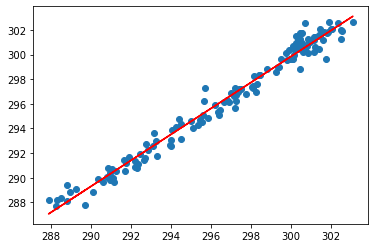

In [42]:
plt.scatter(x,y)
plt.plot(x,Tair_lrg.predict(x.reshape(-1,1)), color = 'r')
plt.show()


In [43]:
px.line(x = np.arange(len(y)), y = [y, x, pred])

# total precipetation

RMSE between precipitation:0.3263305489489359 and P correlation:0.7736664735109449
on test data "X_test"
root mean squared error: 0.12839143855032867
r2 score 0.7434185924313659


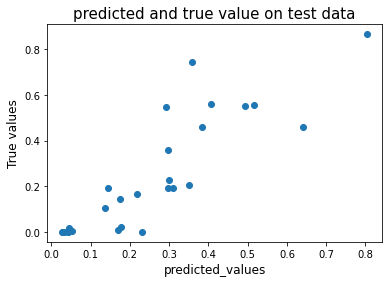

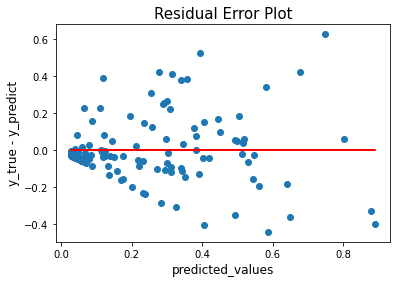

rmse after tranning: 0.17177267546144928
MAPE before tranning: 51372602000124.59
MAPE after tranning: 52817923019157.2


In [44]:
x = gd_df['APCP_sfc_Kg/m2'].values
y = gd_df['Rainf'].values
print(f"RMSE between precipitation:{mean_squared_error(y,x, squared = False)} and P correlation:{pearsonr(x,y)[0]}")
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 42, test_size = 0.2)
ppt_lrg = LinearRegression()
ppt_lrg.fit(x_train.reshape(-1,1), y_train)
test_model(ppt_lrg)
pred = ppt_lrg.predict(x.reshape(-1,1))
residual_error_plot(y, pred)
print('rmse after tranning:',mean_squared_error(y, pred, squared = False))
print('MAPE before tranning:',mean_absolute_percentage_error(y, x))
print('MAPE after tranning:',mean_absolute_percentage_error(y, pred))

In [45]:
px.line(x = np.arange(len(y)), y = [y, x, pred])

# For Downward long wave radiaton

RMSE between DLWR:11.459098277133467 and P correlation:0.9892855856756351


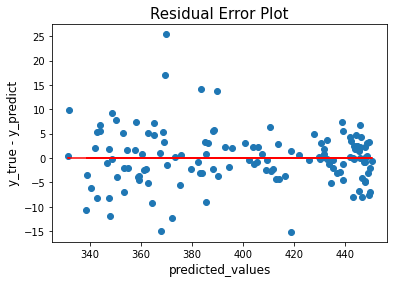

rmse after tranning: 5.610303946053902
MAPE before tranning: 0.025289742210123464
MAPE after tranning: 0.010378342842659012


In [46]:
x =gd_df['DLWRF_sfc_K/m2'].values
y = gd_df['LWdown'].values
print(f"RMSE between DLWR:{mean_squared_error(y,x, squared = False)} and P correlation:{pearsonr(x,y)[0]}")
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 42, test_size = 0.2)
DLWR_lrg = LinearRegression()
DLWR_lrg.fit(x_train.reshape(-1,1), y_train)
pred = DLWR_lrg.predict(x.reshape(-1,1))
residual_error_plot(y, pred)
print('rmse after tranning:',mean_squared_error(y, pred, squared = False))
print('MAPE before tranning:',mean_absolute_percentage_error(y, x))
print('MAPE after tranning:',mean_absolute_percentage_error(y, pred))

on test data "X_test"
root mean squared error: 5.82173095333851
r2 score 0.9694671750040548


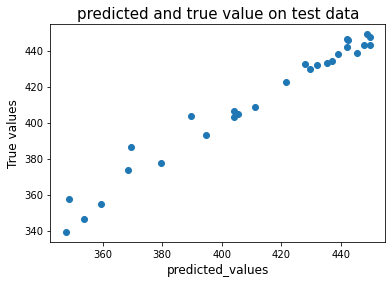

RMSE after tranning 5.610303946053902


In [47]:
test_model(DLWR_lrg)
print('RMSE after tranning',mean_squared_error(y, DLWR_lrg.predict(x.reshape(-1,1)), squared = False))

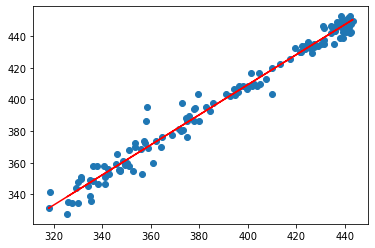

In [48]:
plt.scatter(x,y)
plt.plot(x,DLWR_lrg.predict(x.reshape(-1,1)), color = 'r')

In [49]:
px.line(x = np.arange(len(y)), y = [y, x, pred])

# For Surface presure

RMSE between Psurf:22.019171257200952 and P correlation:0.9890747774565867


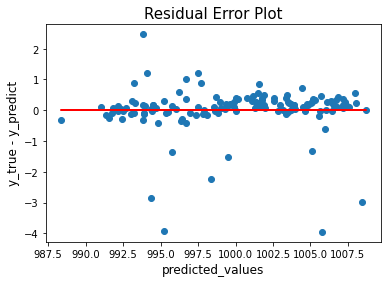

rmse after tranning: 0.7576495334209911
MAPE before tranning: 0.022005936394746625
MAPE after tranning: 0.00038766308963983045


In [50]:
x =gd_df['PRES_sfc_hPa'].values
y = gd_df['Psurf'].values
print(f"RMSE between Psurf:{mean_squared_error(y,x, squared = False)} and P correlation:{pearsonr(x,y)[0]}")
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 42, test_size = 0.2)
Psurf_lrg = LinearRegression()
Psurf_lrg.fit(x_train.reshape(-1,1), y_train)
pred = Psurf_lrg.predict(x.reshape(-1,1))
residual_error_plot(y, pred)
print('rmse after tranning:',mean_squared_error(y, pred, squared = False))
print('MAPE before tranning:',mean_absolute_percentage_error(y, x))
print('MAPE after tranning:',mean_absolute_percentage_error(y, pred))

on test data "X_test"
root mean squared error: 0.34556657750151076
r2 score 0.9951656799367902


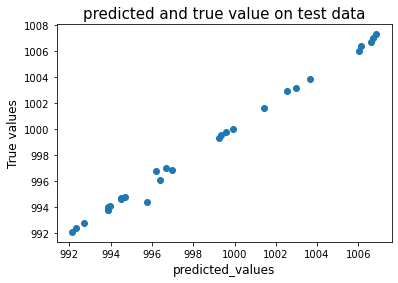

0.7576495334209911

In [51]:
test_model(Psurf_lrg)
mean_squared_error(y, Psurf_lrg.predict(x.reshape(-1,1)), squared = False)

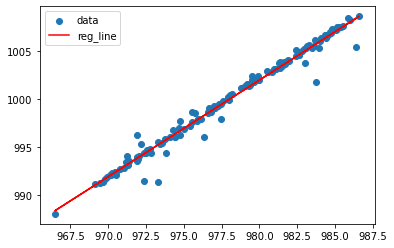

In [52]:
plt.scatter(x,y, label = 'data')
plt.plot(x,Psurf_lrg.predict(x.reshape(-1,1)), color = 'r', label = 'reg_line')
plt.legend()
plt.show()

In [53]:
px.line(x = np.arange(len(y)), y = [y, x, pred])

In [54]:
wind_df = pd.DataFrame()
wind_df['date'] = df.date.values
wind_df['month'] = pd.to_datetime(wind_df['date']).dt.month
wind_df['doy'] = pd.to_datetime(wind_df['date']).dt.day_of_year
wind_df['u_wind'] = df['UGRD_10m_m s-1'].values
wind_df['v_wind'] = df['VGRD_10m_m s-1'].values
wind_df['IMDAA_wind'] = np.sqrt(np.square(wind_df.u_wind.values)+np.square(wind_df.v_wind.values))
wind_df['wind'] = ft_df['Wind'].values
wind_df

date  month  doy    u_wind    v_wind  IMDAA_wind      wind
0    2016-01-01      1    1 -0.344012 -0.168148    0.382907  0.522961
1    2016-01-09      1    9 -0.715742 -0.168148    0.735228  0.520553
2    2016-01-17      1   17 -0.347159 -0.168148    0.385737  0.541057
3    2016-01-25      1   25 -0.530849 -0.168148    0.556843  0.516761
4    2016-02-02      2   33 -0.542372 -0.168148    0.567839  0.517101
..          ...    ...  ...       ...       ...         ...       ...
133  2018-11-25     11  329 -0.793646 -0.146047    0.806972  0.396667
134  2018-12-03     12  337 -0.713855 -0.146047    0.728641  0.447309
135  2018-12-11     12  345 -1.024108 -0.146047    1.034469  0.532031
136  2018-12-19     12  353 -0.292866 -0.146047    0.327262  0.414826
137  2018-12-27     12  361 -0.110584 -0.146047    0.183190  0.443889

[138 rows x 7 columns]

<AxesSubplot:>

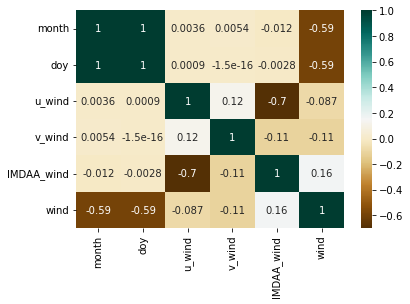

In [55]:
matrix = wind_df.corr()
sns.heatmap(matrix,annot = True, cmap = 'BrBG')

In [56]:
wind_df['month'] = wind_df['month'].astype('str')

In [57]:
px.scatter(wind_df, x = 'IMDAA_wind', y = 'wind', color = 'month')

In [58]:
model = LinearRegression()
x = wind_df['IMDAA_wind'].values.reshape(-1,1)
y = wind_df['wind'].values
print('corr', cov(wind_df['IMDAA_wind'],y))
print('pearson', pearsonr(wind_df['IMDAA_wind'],y))
model.fit(x,y)
print('before',mean_squared_error(x,y, squared = False))
print('after',mean_squared_error(y, model.predict(x), squared = False))
print(f"r2_score:{r2_score(y, x)}, r2 score:{r2_score(y, model.predict(x))}")

corr [[0.13210042 0.00450163]
 [0.00450163 0.00591051]]
pearson (0.16110337865649146, 0.059070052437656305)
before 0.4080844957155171
after 0.07560021515788534
r2_score:-27.381376900635498, r2 score:0.025954298614536686


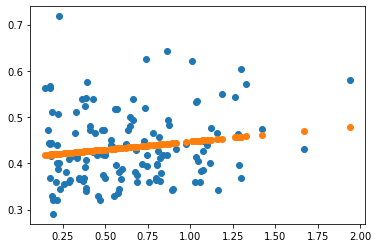

In [59]:
plt.scatter(x,y)
plt.scatter(x, model.predict(x))

In [60]:
px.scatter(x = wind_df['date'], y = [wind_df['IMDAA_wind'],y, model.predict(x)])

# For wind and DSWRF

In [61]:
season_df = pd.DataFrame()
season_df['date'] = df.date.values
season_df['month'] = pd.to_datetime(season_df['date']).dt.month
season_df['doy'] = pd.to_datetime(season_df['date']).dt.day_of_year
season_df['u_wind'] = df['UGRD_10m_m s-1'].values
season_df['v_wind'] = df['VGRD_10m_m s-1'].values
season_df['IMDAA_wind'] = np.sqrt(np.square(season_df.u_wind.values)+np.square(season_df.v_wind.values))
season_df['DSWRF'] = df['DSWRF_sfc_W/m2'].values
season_df['SWdown'] = ft_df['SWdown'].values
season_df['wind'] = ft_df['Wind'].values
season_df

date  month  doy    u_wind    v_wind  IMDAA_wind       DSWRF  \
0    2016-01-01      1    1 -0.344012 -0.168148    0.382907  221.383386   
1    2016-01-09      1    9 -0.715742 -0.168148    0.735228  200.802186   
2    2016-01-17      1   17 -0.347159 -0.168148    0.385737  197.784223   
3    2016-01-25      1   25 -0.530849 -0.168148    0.556843  213.459600   
4    2016-02-02      2   33 -0.542372 -0.168148    0.567839  239.015898   
..          ...    ...  ...       ...       ...         ...         ...   
133  2018-11-25     11  329 -0.793646 -0.146047    0.806972  234.244251   
134  2018-12-03     12  337 -0.713855 -0.146047    0.728641  206.267298   
135  2018-12-11     12  345 -1.024108 -0.146047    1.034469  176.469967   
136  2018-12-19     12  353 -0.292866 -0.146047    0.327262  194.198241   
137  2018-12-27     12  361 -0.110584 -0.146047    0.183190  206.604847   

        SWdown      wind  
0    123.49051  0.522961  
1    117.42937  0.520553  
2    109.30230  0.541057  
3    122.23508  0.516761  
4    126.32801  0.517101  
..         ...       ...  
133  170.67633  0.396667  
134  156.27519  0.447309  
135  128.32938  0.532031  
136  140.83458  0.414826  
137  152.63124  0.443889  

[138 rows x 9 columns]

In [62]:
print(f"rmse on wind = {mean_squared_error(season_df.IMDAA_wind, season_df.wind, squared = False)}")
print(f"rmse on DSWRF = {mean_squared_error(season_df.DSWRF, season_df.SWdown, squared = False)}")
print(f"rmse on DSWRF after sclae = {mean_squared_error(season_df.DSWRF-90, season_df.SWdown, squared = False)}")

rmse on wind = 0.4080844957155171
rmse on DSWRF = 86.71774988874596
rmse on DSWRF after sclae = 35.93036077271797


In [63]:
winter_df = season_df[season_df['month'].isin([1, 2, 12])]
premonsoon_df = season_df[season_df['month'].isin([3,4,5])]
monsoon_df = season_df[season_df['month'].isin([6,7,8,9])]
postmonsoon_df = season_df[season_df['month'].isin([10,11])]

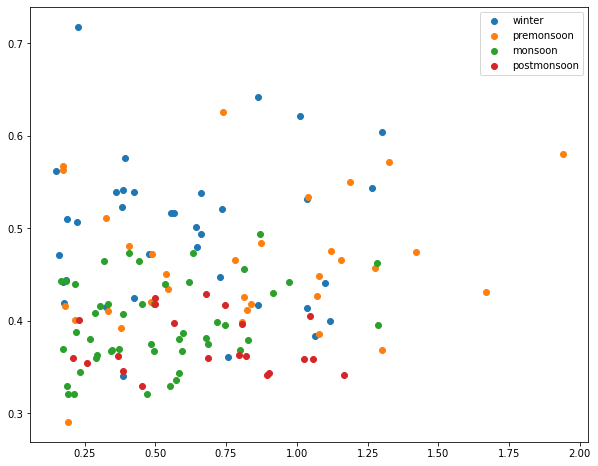

In [64]:
plt.figure(figsize = (10,8))
plt.scatter(winter_df.IMDAA_wind, winter_df.wind, label = 'winter')
plt.scatter(premonsoon_df.IMDAA_wind, premonsoon_df.wind, label = 'premonsoon')
plt.scatter(monsoon_df.IMDAA_wind, monsoon_df.wind, label = 'monsoon')
plt.scatter(postmonsoon_df.IMDAA_wind, postmonsoon_df.wind, label = 'postmonsoon')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

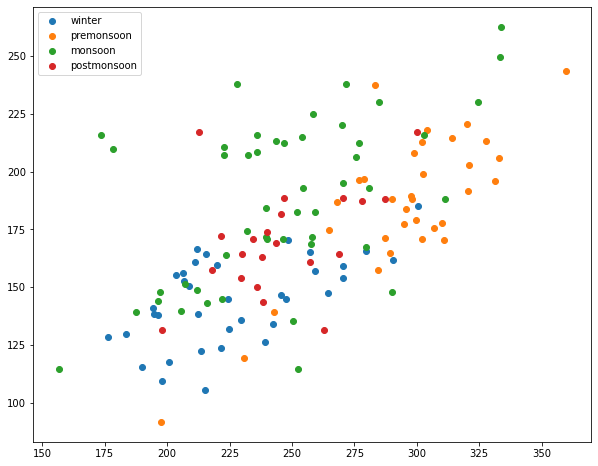

In [65]:
plt.figure(figsize = (10,8))
plt.scatter(winter_df.DSWRF, winter_df.SWdown, label = 'winter')
plt.scatter(premonsoon_df.DSWRF, premonsoon_df.SWdown, label = 'premonsoon')
plt.scatter(monsoon_df.DSWRF, monsoon_df.SWdown, label = 'monsoon')
plt.scatter(postmonsoon_df.DSWRF, postmonsoon_df.SWdown, label = 'postmonsoon')
plt.legend()
plt.show

In [66]:
print('corr', cov(gd_df['DSWRF_sfc_W/m2'].values, gd_df['SWdown'].values))
print('pearson', pearsonr(gd_df['DSWRF_sfc_W/m2'].values, gd_df['SWdown'].values))
print('RMSE:',mean_squared_error(gd_df['DSWRF_sfc_W/m2'].values, gd_df['SWdown'].values, squared = False))

corr [[1732.56494039  850.83865856]
 [ 850.83865856 1160.69073309]]
pearson (0.5999902523186182, 7.440088023646525e-15)
RMSE: 86.71774988874596


In [67]:
def create_model(input_, target_):
    error = mean_squared_error(input_, target_)
    model = LinearRegression()
    x_train, x_test, y_train, y_test = train_test_split(input_,target_,test_size = 0.2, random_state = 42)
    model.fit(x_train.reshape(-1,1), y_train)
    test_error = mean_squared_error(y_test, model.predict(x_test.reshape(-1,1)))
    e_error = mean_squared_error(target_, model.predict(input_.reshape(-1,1)))
    return model, pd.DataFrame({'error':[error, test_error, e_error]}, index = ['error_on entire set', 'error on test', 'error after training'])

In [68]:
wind_win_model, wind_win_error = create_model(winter_df['IMDAA_wind'].values, winter_df['wind'].values)
wind_premon_model, wind_premon_error = create_model(premonsoon_df['IMDAA_wind'].values, premonsoon_df['wind'].values)
wind_mon_model, wind_mon_error = create_model(monsoon_df['IMDAA_wind'].values, monsoon_df['wind'].values)
wind_postmon_model, wind_postmon_error = create_model(postmonsoon_df['IMDAA_wind'].values, postmonsoon_df['wind'].values)

In [69]:
wind_premon_error

error
error_on entire set   0.322597
error on test         0.001662
error after training  0.004735

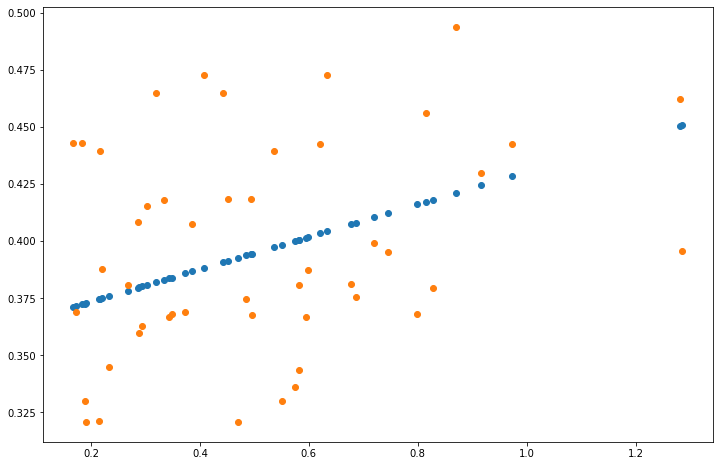

In [70]:
plt.figure(figsize = (12,8))
plt.scatter(monsoon_df.IMDAA_wind, wind_mon_model.predict(monsoon_df.IMDAA_wind.values.reshape(-1,1)))
plt.scatter(monsoon_df.IMDAA_wind, monsoon_df.wind)

In [71]:
px.scatter(x = winter_df.IMDAA_wind, y = winter_df.wind, trendline = 'ols')

In [72]:
def predicted_wind(data):  # data df must contains columns "date, doy, month"
    pred_wind = []
    doy = []
    date = []
    for i in range(data.shape[0]):
        d = data.iloc[i,:]
        date.append(d.date)
        doy.append(d.doy)
        m = d.month
        if m in ([1,2,12]):
            pred_wind.append(wind_win_model.predict(d.IMDAA_wind.reshape(-1,1))[0])
        elif m in ([3,4,5]):
            pred_wind.append(wind_premon_model.predict(d.IMDAA_wind.reshape(-1,1))[0])
        elif m in ([6,7,8,9]):
            pred_wind.append(wind_mon_model.predict(d.IMDAA_wind.reshape(-1,1))[0])
        elif m in ([10,11]):
            pred_wind.append(wind_postmon_model.predict(d.IMDAA_wind.reshape(-1,1))[0])
        else:
            print('month is not in month')
    pred_df = pd.DataFrame({'date':date, 'DoY':doy, 'pred_wind':pred_wind})
    
    return pred_df

In [73]:
pred_wind = predicted_wind(season_df)
pred_wind

date  DoY  pred_wind
0    2016-01-01    1   0.517907
1    2016-01-09    9   0.489570
2    2016-01-17   17   0.517679
3    2016-01-25   25   0.503917
4    2016-02-02   33   0.503033
..          ...  ...        ...
133  2018-11-25  329   0.375652
134  2018-12-03  337   0.490100
135  2018-12-11  345   0.465502
136  2018-12-19  353   0.522382
137  2018-12-27  361   0.533970

[138 rows x 3 columns]

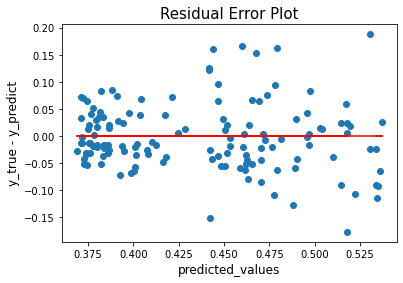

rmse before tranning: 0.4080844957155171
rmse after tranning: 0.06169906674648146
MAPE before tranning: 0.7230030152749992
MAPE after tranning: 0.10895383553549665


In [74]:
pred = pred_wind.pred_wind
true = season_df.wind
residual_error_plot(true, pred)
print('rmse before tranning:',mean_squared_error(true, season_df.IMDAA_wind, squared = False))
print('rmse after tranning:',mean_squared_error(true, pred, squared = False))
print('MAPE before tranning:',mean_absolute_percentage_error(true,season_df.IMDAA_wind))
print('MAPE after tranning:',mean_absolute_percentage_error(true, pred))

In [75]:
px.line(season_df, x = 'date', y =  ['wind',season_df.IMDAA_wind, pred_wind.pred_wind.values])

In [76]:
px.scatter(x = pred_wind.pred_wind, y = [pred_wind.pred_wind,season_df.wind])

In [77]:
dswrf_win_model ,dswrf_win_error= create_model(winter_df.DSWRF.values, winter_df.SWdown.values)
dswrf_premon_model ,dswrf_premon_error= create_model(premonsoon_df.DSWRF.values, premonsoon_df.SWdown.values)
dswrf_mon_model ,dswrf_mon_error= create_model(monsoon_df.DSWRF.values, monsoon_df.SWdown.values)
dswrf_postmon_model ,dswrf_postmon_error= create_model(postmonsoon_df.DSWRF.values, postmonsoon_df.SWdown.values)

In [78]:
def predicted_dswrf(data):  # data df must contains columns "date, doy, month"
    pred_dswr = []
    doy = []
    date = []
    for i in range(data.shape[0]):
        d = data.iloc[i,:]
        date.append(d.date)
        doy.append(d.doy)
        m = d.month
        if m in ([1,2,12]):
            pred_dswr.append(dswrf_win_model.predict(d.DSWRF.reshape(-1,1))[0])
        elif m in ([3,4,5]):
            pred_dswr.append(dswrf_premon_model.predict(d.DSWRF.reshape(-1,1))[0])
        elif m in ([6,7,8,9]):
            pred_dswr.append(dswrf_mon_model.predict(d.DSWRF.reshape(-1,1))[0])
        elif m in ([10,11]):
            pred_dswr.append(dswrf_postmon_model.predict(d.DSWRF.reshape(-1,1))[0])
        else:
            print('month is not in month')
    pred_df = pd.DataFrame({'date':date, 'DoY':doy, 'pred_dswr':pred_dswr})
    
    return pred_df

In [79]:
pred_dswrf = predicted_dswrf(season_df)
pred_dswrf

date  DoY   pred_dswr
0    2016-01-01    1  143.051435
1    2016-01-09    9  135.872477
2    2016-01-17   17  134.819777
3    2016-01-25   25  140.287528
4    2016-02-02   33  149.201858
..          ...  ...         ...
133  2018-11-25  329  165.078591
134  2018-12-03  337  137.778770
135  2018-12-11  345  127.385120
136  2018-12-19  353  133.568945
137  2018-12-27  361  137.896511

[138 rows x 3 columns]

In [80]:
px.line(x = season_df.date, y = [season_df.SWdown, pred_dswrf.pred_dswr])

import pickle
m = pickle.dumps(win_model)

In [81]:
print(f"rmse before traning = {mean_squared_error(season_df.SWdown, season_df.DSWRF, squared = False)}")
print(f"rmse after subtract scale value 90 = {mean_squared_error(season_df.SWdown, season_df.DSWRF-90, squared = False)}")
print(f"rmse after traning = {mean_squared_error(season_df.SWdown, pred_dswrf.pred_dswr, squared = False)}")
print(f"r2 score = {r2_score(season_df.SWdown, pred_dswrf.pred_dswr)}")

rmse before traning = 86.71774988874596
rmse after subtract scale value 90 = 35.93036077271797
rmse after traning = 23.453334438802635
r2 score = 0.5226343168404091


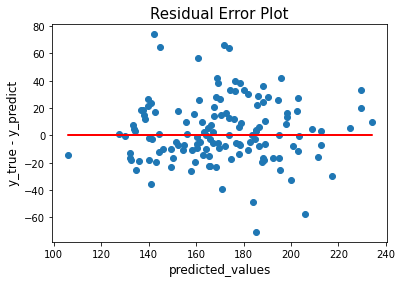

rmse before tranning: 86.71774988874596
rmse after tranning: 23.453334438802635
MAPE before tranning: 0.49380027709462365
MAPE after tranning: 0.10333361081793858


In [82]:
pred = pred_dswrf.pred_dswr
true = season_df.SWdown
residual_error_plot(true, pred)
print('rmse before tranning:',mean_squared_error(true, season_df.DSWRF, squared = False))
print('rmse after tranning:',mean_squared_error(true, pred, squared = False))
print('MAPE before tranning:',mean_absolute_percentage_error(true,season_df.DSWRF))
print('MAPE after tranning:',mean_absolute_percentage_error(true, pred))

In [83]:
def gd_adjust(data):
    if 'month' and 'doy' in data.columns:
        pass
    else:
        data['month'] = pd.to_datetime(data['date']).dt.month
        data['doy'] = pd.to_datetime(data['date']).dt.day_of_year
    adj_Tair = data.TMP_2m_K.values
    adj_DLWRF = DLWR_lrg.predict(data['DLWRF_sfc_K/m2'].values.reshape(-1,1))
    adj_Psurf = Psurf_lrg.predict(data['PRES_sfc_hPa'].values.reshape(-1,1))
    data['IMDAA_wind'] = np.sqrt(np.square(data['UGRD_10m_m s-1'].values) + np.square(data['VGRD_10m_m s-1'].values))
    adj_wind = predicted_wind(data).pred_wind.values
    data['DSWRF'] = data['DSWRF_sfc_W/m2'].values
    adj_DSWRF = predicted_dswrf(data).pred_dswr.values
    #vpd = vpd_lrg.predict(data['VPD_hPa'].values.reshape(-1,1))
    vpd = data['VPD_hPa'].values
    ppt = ppt_lrg.predict(data['APCP_sfc_Kg/m2'].values.reshape(-1,1))
    
    return pd.DataFrame({'date':data.date.values, 'adj_Tair':adj_Tair, 'adj_DLWRF':adj_DLWRF,
                         'adj_Psurf':adj_Psurf, 'adj_wind':adj_wind, 'adj_DSWRF':adj_DSWRF,
                         'ppt':ppt, 'adj_VPD':vpd})

In [84]:
df = pd.read_csv('F:\env_parameter\\df__8d.csv')
df.drop(1012, axis = 0, inplace = True)
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.fillna(method = 'bfill', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               1012 non-null   object 
 1   RH_2m_%            1012 non-null   float64
 2   TMP_2m_K           1012 non-null   float64
 3   UGRD_10m_m s-1     1012 non-null   float64
 4   VGRD_10m_m s-1     1012 non-null   float64
 5   CISOILM_L1_kg/m-2  966 non-null    float64
 6   DLWRF_sfc_K/m2     1012 non-null   float64
 7   DSWRF_sfc_W/m2     1012 non-null   float64
 8   NLWRF_sfc_W/m2     1012 non-null   float64
 9   NSWRF_sfc_W/m2     1012 non-null   float64
 10  PRES_sfc_hPa       1012 non-null   float64
 11  APCP_sfc_Kg/m2     1012 non-null   float64
 12  VPD_hPa            1012 non-null   float64
 13  PRES_sfc_Pa        1012 non-null   float64
dtypes: float64(13), object(1)
memory usage: 110.8+ KB


In [85]:
adj_df = gd_adjust(df)
adj_df

date    adj_Tair   adj_DLWRF    adj_Psurf  adj_wind   adj_DSWRF  \
0     2000-01-01  287.588958  319.162893  1005.399780  0.497139  146.224056   
1     2000-01-09  289.008177  342.581831  1004.398582  0.512361  141.563438   
2     2000-01-17  288.847198  347.065169  1005.762634  0.463955  137.346168   
3     2000-01-25  288.730006  334.363068  1007.754310  0.475051  146.402547   
4     2000-02-02  288.798823  352.723012  1005.418138  0.474345  136.981638   
...          ...         ...         ...          ...       ...         ...   
1007  2021-11-25  292.498664  349.695513  1012.287516  0.368941  153.183640   
1008  2021-12-03  293.654439  370.250534  1012.965630  0.481858  121.864007   
1009  2021-12-11  291.023935  342.629139  1013.363675  0.478531  124.024239   
1010  2021-12-19  289.759173  333.075296  1012.332992  0.476233  123.366070   
1011  2021-12-27  289.246969  342.776479  1016.383174  0.483269  111.526839   

           ppt   adj_VPD  
0     0.027945  4.421783  
1     0.033715  4.569245  
2     0.052092  4.206105  
3     0.059011  5.376185  
4     0.073707  3.645921  
...        ...       ...  
1007  0.027948  6.365177  
1008  0.032116  5.522782  
1009  0.032098  5.329546  
1010  0.028322  5.949265  
1011  0.029154  5.788793  

[1012 rows x 8 columns]

In [86]:
adj_df.to_csv('F:\env_parameter\\adj_df.csv')

In [87]:
"""
Tair = merge_df['TMP_2m_K']-273.15
SVP = 610.7*10**(7.5*Tair/(237.3 + Tair))
AVP = SVP*merge_df['RH_2m_%']/10000
VPD = SVP - AVP
merge_df['VPD'] = VPD/100
"""
#..........................
Tair = adj_df['adj_Tair'] - 273
SVP =610.7*10**(7.5*Tair/(237.3 + Tair))
AVP = SVP*df['RH_2m_%']/100
VPD = SVP - AVP
#merge_df['VPD'] = VPD/100

In [88]:
px.histogram(x = VPD)

In [89]:
px.histogram(x = np.log(VPD))